# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. 
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 28 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

---
### Задача 1.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
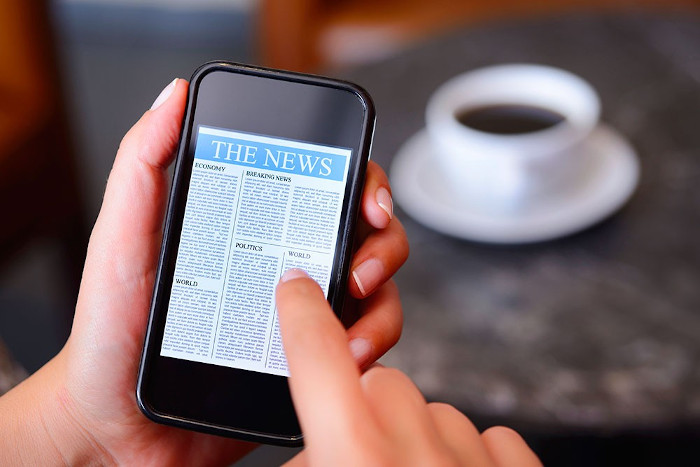



Перед выполнением задачи обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [3]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [4]:
print(data_train['data'][-2])

In article <1qkgbuINNs9n@shelley.u.washington.edu> bolson@carson.u.washington.edu (Edward Bolson) writes:
>Boy, this will be embarassing if it is trivial or an FAQ:
>
>Given 4 points (non coplanar), how does one find the sphere, that is,
>center and radius, exactly fitting those points?  I know how to do it
>for a circle (from 3 points), but do not immediately see a 
>straightforward way to do it in 3-D.  I have checked some
>geometry books, Graphics Gems, and Farin, but am still at a loss?
>Please have mercy on me and provide the solution?  

Wouldn't this require a hyper-sphere.  In 3-space, 4 points over specifies
a sphere as far as I can see.  Unless that is you can prove that a point
exists in 3-space that is equi-distant from the 4 points, and this may not
necessarily happen.

Correct me if I'm wrong (which I quite possibly am!)

steve
---





Индекс тематической группы для каждого сообщения

In [5]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [6]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

In [7]:
size = len(data_train['data'])
valid = pd.concat([pd.Series(data_train['data'][:size//3]), pd.Series(data_train['target'][:size//3])], axis=1)
valid.rename(columns={0: 'text', 1: 'target'}, inplace=True)

train = pd.concat([pd.Series(data_train['data'][size//3:]), pd.Series(data_train['target'][size//3:])], axis=1)
train.rename(columns={0: 'text', 1: 'target'}, inplace=True)

test = pd.concat([pd.Series(data_test['data']), pd.Series(data_test['target'])], axis=1)
test.rename(columns={0: 'text', 1: 'target'}, inplace=True)

In [8]:
train.head()

,text,target
0,In <1993Apr20.072905.21404@fel.tno.nl> mveraar...,2
1,"Hi all,\n\n I would like to purchase CD-ROM d...",3
2,"After tons of mail, could we move this discuss...",19
3,wquinnan@sdcc13.ucsd.edu (Malcusco) writes:\n\...,15
4,"{Michael Fulbright} said\n ""Analog switches/...",12


In [9]:
counts = pd.value_counts(train['target'], ascending=True)

<AxesSubplot: xlabel='Индекс тематики', ylabel='Кол-во новостей'>

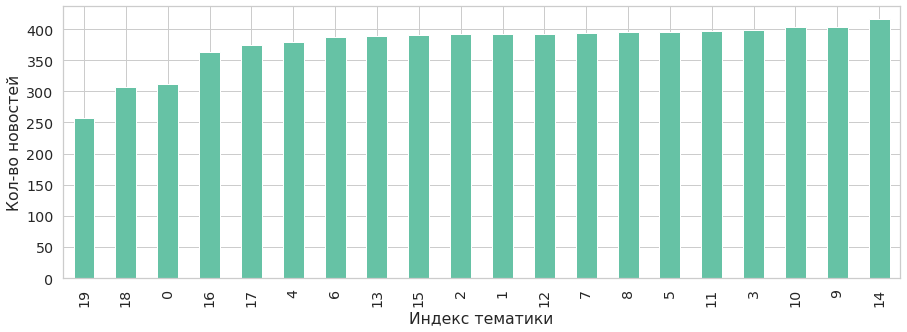

In [11]:
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
plt.figure(figsize=(15, 5))
plt.xlabel('Индекс тематики')
plt.ylabel('Кол-во новостей')
counts.plot(kind='bar')

Видим, что сильного смещения в распределении статей нету.

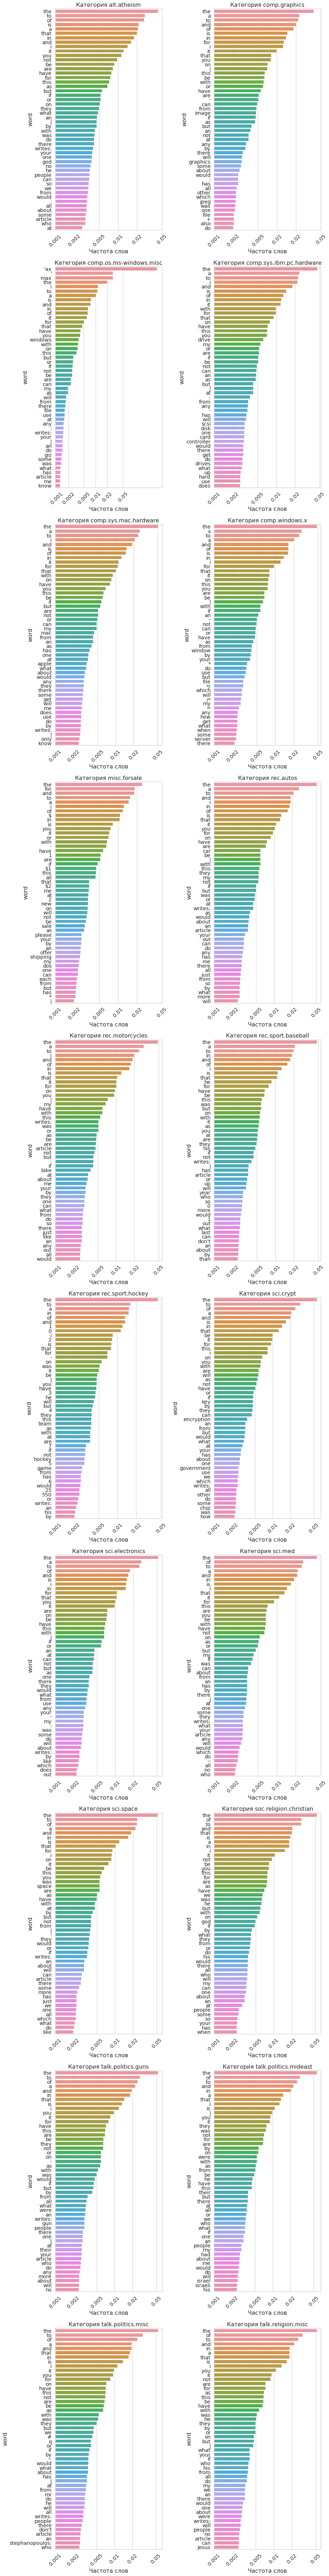

In [12]:
plt.figure(figsize=(13, 100))
labels = [1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2]

# для каждого класса
for index, theme in enumerate(data_train['target_names']):
    # извлечем все сообщения и склеим их
    all_words = ' '.join(
        train[train['target'] == index]['text']
    # приведем к нижнему регистру, удалим точки, разделим на слова
    ).lower().replace('.', '').replace('>', ' ').split()
    # общее количество слов в этом классе
    words_count = len(all_words)

    # посчитаем встречаемость каждого слова и вернем топ-50
    counts = Counter(all_words).most_common(50)
    counts = pd.DataFrame(counts, columns=['word', 'count'])
    
    plt.subplot(10, 2, index+1)
    sns.barplot(y=counts['word'], x=counts['count']/words_count)
    plt.xscale('log')
    plt.xlabel('Частота слов')
    plt.title('Категория {}'.format(theme))
    plt.xticks(labels, labels, rotation=45)
    
plt.tight_layout()

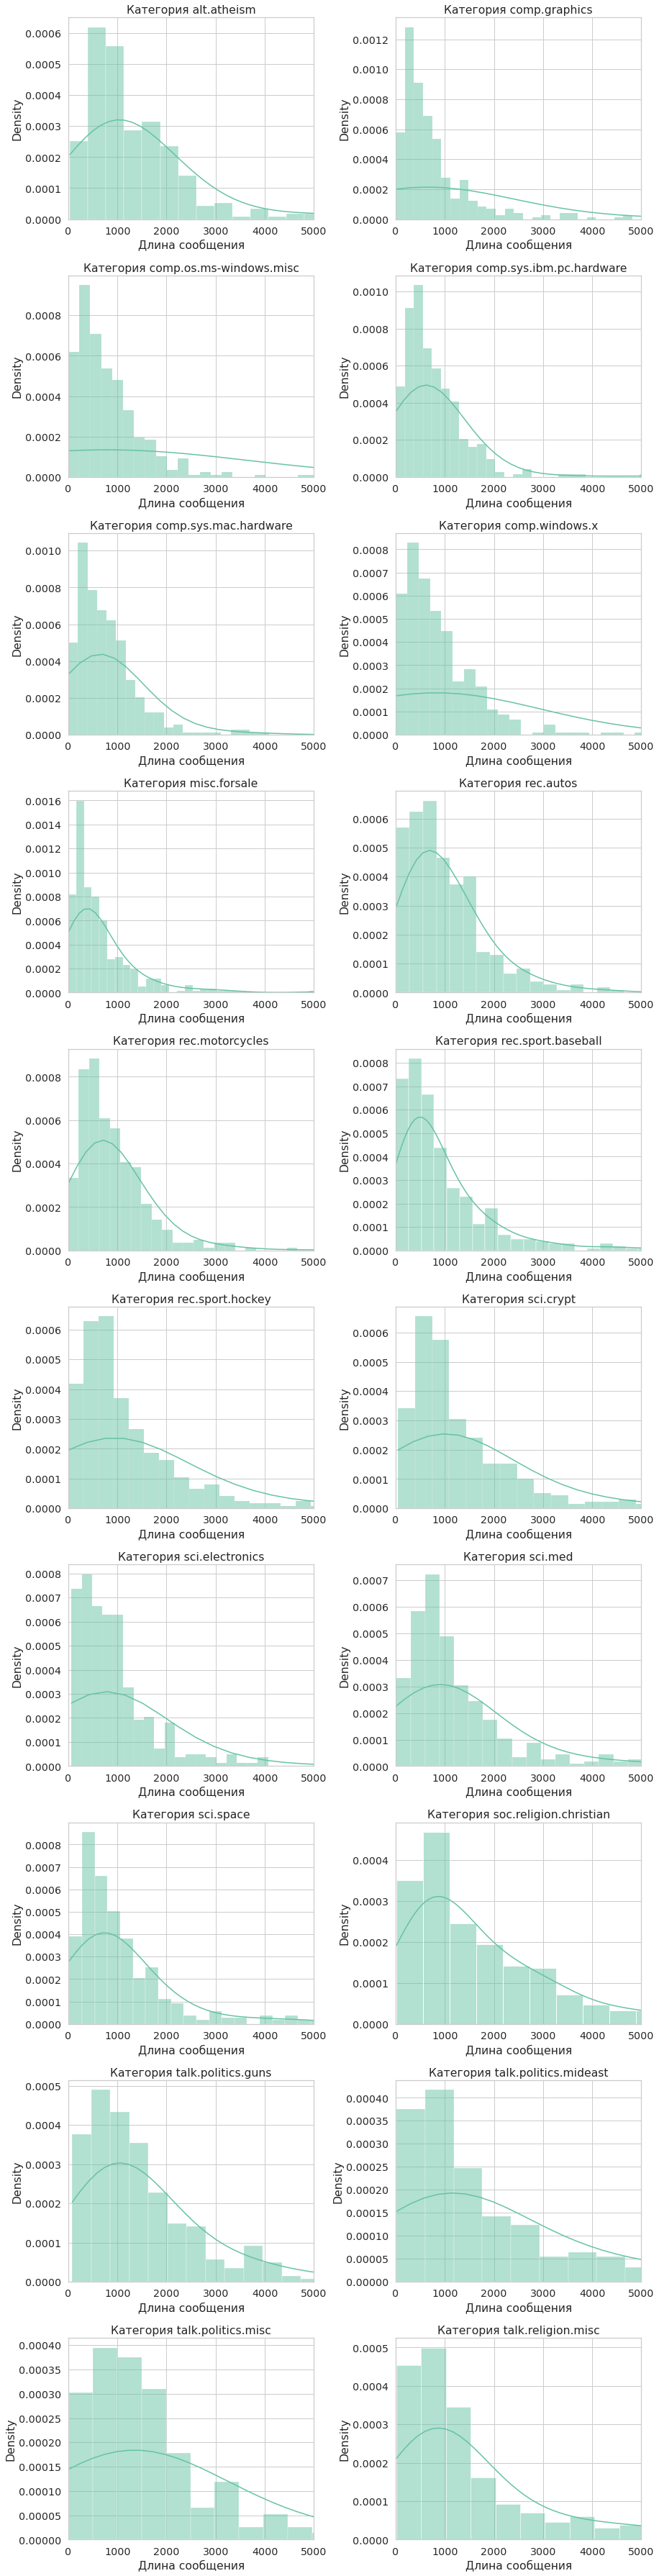

In [13]:
plt.figure(figsize=(13, 50))

# для каждого класса
for index, theme in enumerate(data_train['target_names']):

    plt.subplot(10, 2, index+1)
    sns.histplot(x=train[train['target']==index]['text'].apply(len), stat='density', 
        kde=True, common_norm=False)
    plt.xlabel('Длина сообщения')
    plt.title('Категория {}'.format(theme))
    plt.xlim((0, 5000))
    
plt.tight_layout()

Распределения длины текста довольно похожи для разных категорий, поэтому признак длина текста для нашей задачи неинформативен.

In [14]:
vectorizer = CountVectorizer(min_df=0.01, max_df=0.05)

vec_data_train = vectorizer.fit_transform(train['text']).toarray()
vec_data_valid = vectorizer.transform(valid['text']).toarray()

multinomial_nb = MultinomialNB()
multinomial_nb.fit(vec_data_train, train['target'])

predictions = multinomial_nb.predict(vec_data_valid)
print(f'Точность: {accuracy_score(valid["target"], predictions) :.3}')

Точность: 0.682


Сравним с наивным байесовским классификатором.

In [15]:
X_train = (vec_data_train > 0).astype(int)
X_valid = (vec_data_valid > 0).astype(int)

bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, train["target"])
predictions = bernoulli_nb.predict(X_valid)

print(f'Точность: {accuracy_score(valid["target"], predictions) :.3}')

Точность: 0.607


Далее будем перебирать гиперпараметры MultinomialNB()

In [16]:
min_max = np.array([(x, y) for x in np.arange(0.0004, 0.001, 0.0001) for y in np.arange(0.01, 0.031, 0.005)])

acc = []
for min_df, max_df in min_max:
    vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)

    vec_data_train = vectorizer.fit_transform(train['text']).toarray()
    vec_data_valid = vectorizer.transform(valid['text']).toarray()

    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(vec_data_train, train['target'])

    predictions = multinomial_nb.predict(vec_data_valid)
    acc.append(accuracy_score(valid["target"], predictions))

In [17]:
max_acc_idx = np.argmax(np.array(acc))
opt_min_df, opt_max_df = min_max[max_acc_idx][0], min_max[max_acc_idx][1]

In [18]:
alphas = np.arange(0, 1, 0.01)

vectorizer = CountVectorizer(min_df=opt_min_df, max_df=opt_max_df)

vec_data_train = vectorizer.fit_transform(train['text']).toarray()
vec_data_valid = vectorizer.transform(valid['text']).toarray()

acc = []
for alpha in alphas:
    multinomial_nb = MultinomialNB(alpha=alpha)
    multinomial_nb.fit(vec_data_train, train['target'])

    predictions = multinomial_nb.predict(vec_data_valid)
    acc.append(accuracy_score(valid["target"], predictions))

Максимальная точность при Alpha = 0.02


Text(0, 0.5, 'Accuracy')

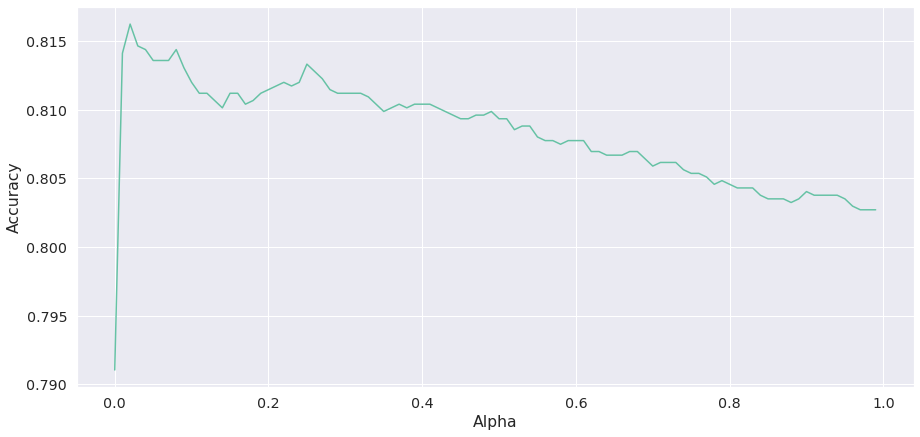

In [19]:
opt_alpha = alphas[np.argmax(np.array(acc))]
print('Максимальная точность при Alpha = {}'.format(opt_alpha))

sns.set(style='darkgrid', font_scale=1.3, palette='Set2')
plt.figure(figsize=(15, 7))
plt.plot(alphas, acc)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

Посчитайте качество на тестовой выборке.

In [20]:
vectorizer = CountVectorizer(min_df=opt_min_df, max_df=opt_max_df)

vec_data_train = vectorizer.fit_transform(train['text']).toarray()
vec_data_test = vectorizer.transform(test['text']).toarray()

multinomial_nb = MultinomialNB(alpha=opt_alpha)
multinomial_nb.fit(vec_data_train, train['target'])

predictions = multinomial_nb.predict(vec_data_test)
accuracy_score(test["target"], predictions)

0.7271640998406798

Сделайте выводы.

Мы построили байесовский классификатор для данных с дискретными признаками, немного преобразовав изнчальные новостные сюжеты.

Также мы заметили, что самые популярные слова $-$ артикли, местоимения, приставки$-$ по категориям практически одинаковые, поэтому пришлось аккуратно подбирать верхнюю границу на частоту появления слов в тексте, чтобы классификатор мог опираться на слова, связанные с темой. 

Аналогично можем сказать и про нижнюю границу, так как в статье могло затеряться слово или художественный оборот, которые с темой никак не соотносятся, из-за чего очень низкую частоту вхождения принимать нельзя.

Был подобран коэффициент сглаживания, благодаря которому точность предсказания несколько выросла.

Само качество модели довольно неплохое, особенно если сравнивать с моделью, которая предскажет самый популярный класс, чья точность будет порядка 5%.

---
### Задача 2.
Пусть $\mathscr{X} = \mathbb{R}^2$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ. Условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.